In [ ]:
from google.colab import drive
drive.mount('/content/drive')

There are 40000, row and 25 columns in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  

(13376, 33)
Timestamp
2020-01-01 00:43:00    1
2020-01-01 00:44:00    0
2020-01-01 00:45:00    0
2020-01-01 00:46:00    0
2020-01-01 00:47:00    0
Freq: min, dtype: int64


Timestamp
2020-01-01 00:43:00    1
2020-01-01 00:44:00    0
2020-01-01 00:45:00    0
2020-01-01 00:46:00    0
2020-01-01 00:47:00    0
Freq: min, dtype: int64
Timestamp
2020-01-01 00:30:00    1
2020-01-01 00:45:00    0
2020-01-01 01:00:00    1
2020-01-01 01:15:00    0
2020-01-01 01:30:00    0
Freq: 15min, dtype: int64


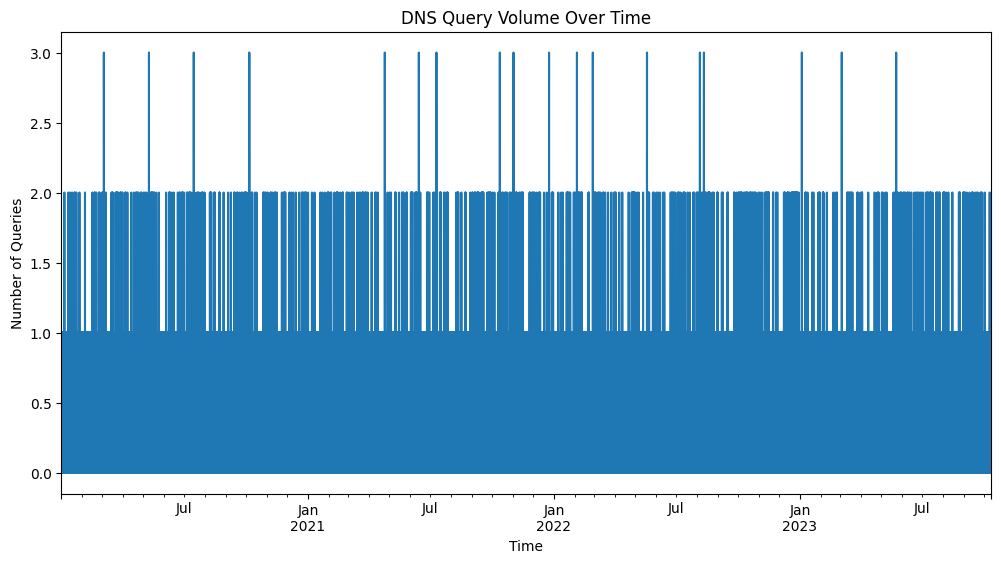

Timestamp
2020-01-01 00:30:00    1
2020-01-01 00:45:00    0
2020-01-01 01:00:00    1
2020-01-01 01:15:00    0
2020-01-01 01:30:00    0
Freq: 15min, dtype: int64


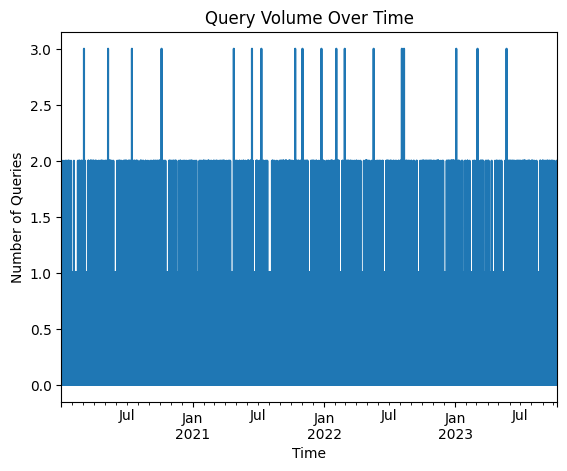

TimeSinceStart values:
                Timestamp  TimeSinceStart
4     2023-07-16 13:11:07     111673660.0
6     2022-05-16 17:55:43      74884336.0
7     2023-02-12 07:13:17      98346590.0
12    2020-09-30 21:35:31      23662324.0
14    2023-02-01 13:17:17      97418030.0
...                   ...             ...
39986 2023-01-09 02:03:32      95390405.0
39987 2022-11-05 11:34:58      89808691.0
39990 2022-03-17 12:32:16      69680929.0
39991 2020-11-14 05:41:54      27493107.0
39997 2022-03-31 01:45:49      70851742.0

[13376 rows x 2 columns]
Min TimeSinceStart: 0.0
Max TimeSinceStart: 119213456.0
count                          39999
mean       0 days 00:04:47.776044401
std      561 days 04:14:28.571038168
min             -1375 days +14:27:54
25%       -403 days +09:53:11.500000
50%                  0 days 23:49:24
75%         402 days 15:03:32.500000
max               1377 days 22:21:12
Name: TimeDiff, dtype: object
40000
Source IP Address
138.156.5.40       1
24.150.253.66      1

Query Entropy: 1.5394910703001345


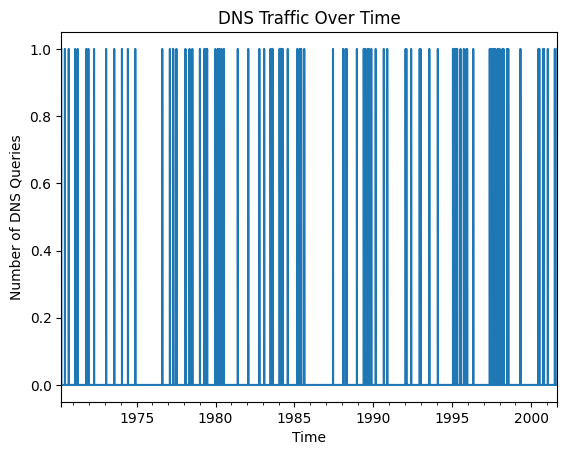

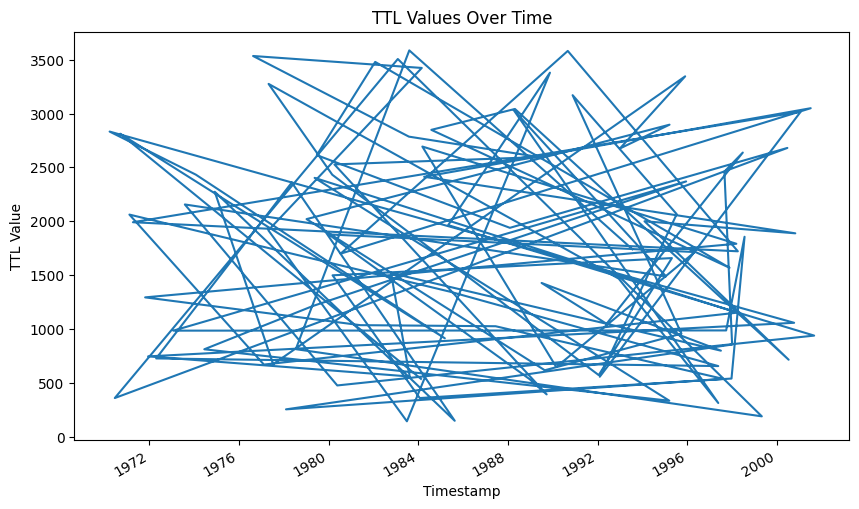

Detected anomalies:                           Query      Response   TTL Traffic Type  Anomaly
Timestamp                                                                
1983-08-05 05:33:54  google.com  140.82.121.3  3587          DNS       -1
1999-04-26 07:55:22  github.com  140.82.121.3   188          DNS       -1
1990-08-30 04:19:58  github.com   192.168.1.1  3582          DNS       -1
1985-08-14 09:54:41  github.com   192.168.1.1   147          DNS       -1
1983-06-27 07:52:39  github.com  140.82.121.3   142          DNS       -1


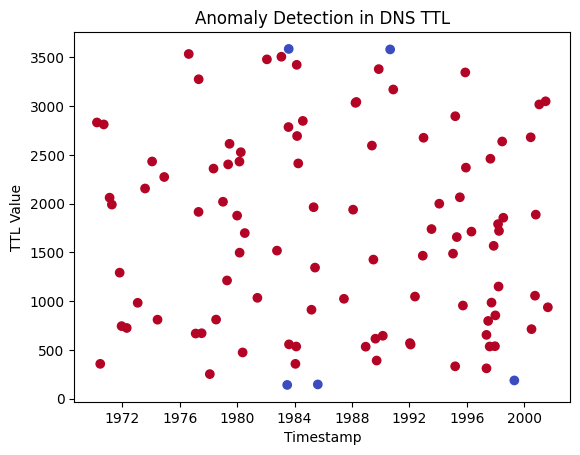

In [2]:

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/cybersecurity_attacks.csv")

df.head(5)

# Name of Columns
df.columns

# Shape of data
print(f"There are {df.shape[0]}, row and {df.shape[1]} columns in the dataset")

# Dataset Info
df.info()

df.isnull().sum().sort_values(ascending=False)

# Determine recent activity
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')

df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

#check sum of missing values
df.isnull().sum().sort_values(ascending=False)
#All Missing Values are removed.

#Explore the Device Information Column¶
df['Device Information'].value_counts()

# Extract 'Device'
df['Browser'] = df['Device Information'].str.split('/').str[0]

#We've created the Browser column.
df['Browser']

import re
# OS and device patterns to search for
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

# Display the extracted device or OS
df['Device/OS']

#We've created the Device/OS column.
df['Browser'].value_counts()

df['Device/OS'].value_counts()

#Dropping the Device Information Column
df = df.drop('Device Information', axis = 1)

df['Device/OS'].value_counts()

def extract_time_features(df, Timestamp):
    # Convert timestamp column to datetime if it's not already
    df[Timestamp] = pd.to_datetime(df[Timestamp])

    # Extract time features
    df['Year'] = df[Timestamp].dt.year
    df['Month'] = df[Timestamp].dt.month
    df['Day'] = df[Timestamp].dt.day
    df['Hour'] = df[Timestamp].dt.hour
    df['Minute'] = df[Timestamp].dt.minute
    df['Second'] = df[Timestamp].dt.second
    df['DayOfWeek'] = df[Timestamp].dt.dayofweek

    return df

# Call the function and store the result in a new DataFrame
new_df = extract_time_features(df, 'Timestamp')

# Check if new columns are created
print(new_df.head())

df.head().T

df.describe(include = 'object').T

# Checking the Day Column ploting with plotly
plt = px.histogram(df, x = 'Day', color = 'Malware Indicators', title = 'Number of Malware Attacks by Day')
plt.show()

# month Distribution
plt = px.histogram(df, x = 'Month', title = 'Month')
plt.show()

# Checking the Month Column ploting with plotly
plt = px.histogram(df, x = 'Month', color = 'Malware Indicators', title = 'Number of Malware Attacks by Month')
plt.show()

# Year Distrition
plt = px.histogram(df, x='Year', title = 'Year')
plt.show()

# Checking the Protocol distribution with Bar Chart Using Plotly
plt = px.histogram(df, x = 'Protocol', color = 'Malware Indicators', title = 'Number of Malware Attacks by Protocol')
plt.show()

# Traffic Distribution
plt = px.pie(df, names = 'Traffic Type', title = 'Traffic Distribution')
plt.show()

# Ploting the Traffic Type distribution with Bar Chart Using Plotly
plt = px.histogram(df, x = 'Traffic Type', color = 'Malware Indicators', title = 'Number of Malware Attacks by Traffic Type')
plt.show()

# Attack Type Distribution
plt = px.pie(df, names = 'Attack Type', title = 'Attack Type Distribution')
plt.show()

# Checking the attack types distribution with Bar Chart Using Plotly
plt = px.histogram(df, x='Attack Type', color='Traffic Type', title='Number of Malware Attacks by Attack Type')
plt.show()

# Browsers Distribution
plt = px.pie(df, names = 'Browser', title = 'Browser Distribution')
plt.show()

# Platform Distribution
plt = px.pie(df, names = 'Device/OS', title = 'Platform Distribution')
plt.show()

# Checking the Browser and Devices with Attack Type distribution with Bar Chart Using Plotly
plt = px.histogram(df, x= 'Device/OS', color = 'Attack Type', title = 'Number of Malware Attacks by Browser and Devices')
plt.show()

dns_filter = df['Traffic Type'] == 'DNS'

filtered_df = df[dns_filter]

# Filter for DNS traffic
dns_filter = df['Traffic Type'].str.strip().str.upper() == 'DNS'
filtered_df = df[dns_filter]
# Now 'filtered_df' contains only rows with DNS traffic.

filtered_df = df[df['Traffic Type'] == 'DNS']
print(filtered_df.shape)

# Convert 'Timestamp' to datetime format
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Group by time intervals ( 1-minute bins) and count queries
query_volume1 = filtered_df.set_index('Timestamp').resample('1Min').size()

print(query_volume1.head())

# Plot the query volume over time
import matplotlib.pyplot as plt

query_volume1.plot(figsize=(12, 6), title='DNS Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.show()

# show the first few records
print(query_volume1.head())

query_volume = filtered_df.set_index('Timestamp').resample('15Min').size()
print(query_volume.head())

# Plot the query volume over time
import matplotlib.pyplot as plt

query_volume.plot(figsize=(12, 6), title='DNS Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.show()

# show the first few records
print(query_volume.head())

import matplotlib.pyplot as plt

query_volume.plot()
plt.title('Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.show()

# Ensure 'Timestamp' is in datetime format
filtered_df['TTL'] = pd.to_datetime(filtered_df['Timestamp'])

# Create a reference timestamp  in the dataset
start_timestamp = filtered_df['TTL'].min()

# Calculate the difference between each timestamp and the reference timestamp in seconds
filtered_df['TimeSinceStart'] = (filtered_df['TTL'] - start_timestamp).dt.total_seconds()

# Print out the TimeSinceStart values to inspect
print("TimeSinceStart values:")
print(filtered_df[['Timestamp', 'TimeSinceStart']])

# Now check the range of TimeSinceStart
print(f"Min TimeSinceStart: {filtered_df['TimeSinceStart'].min()}")
print(f"Max TimeSinceStart: {filtered_df['TimeSinceStart'].max()}")

# Calculate the TTL based on the time difference and your conditions
# Ensure TTL does not go negative, and if TimeSinceStart is small, TTL should not drop to zero
filtered_df['TTL'] = 300 - filtered_df['TimeSinceStart']  # 300 seconds = 5 minutes
# Ensure TTL is not negative
filtered_df['TTL'] = filtered_df['TTL'].clip(lower=0)

# Drop the temporary column
filtered_df = filtered_df.drop('TimeSinceStart', axis=1)

#Check if the timestamps have regular or irregular intervals
# Ensure Timestamp is datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Find time difference between consecutive queries
df['TimeDiff'] = df['Timestamp'].diff()
# Check time gap distribution
print(df['TimeDiff'].describe())

#Check if the domain names in your DNS traffic are unique or repetitive
# Assuming 'Source IP' or 'Destination IP' contains domain information
domain_counts = df['Source IP Address'].value_counts()
print(df['Source IP Address'].nunique())  # Number of unique source IP addresses
# Display top 10 most frequent domains
print(domain_counts.head(10))

import pandas as pd
import random
import time

# Generate synthetic DNS traffic data
data = []
# Generate 100 rows of DNS traffic data
for _ in range(100):
    # Random timestamps
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(random.randint(1, 1000000000)))
    # Random DNS queries
    query = random.choice(['example.com', 'google.com', 'github.com'])
    # Random DNS responses
    response = random.choice(['192.168.1.1', '172.217.5.68', '140.82.121.3'])
    # Random TTL values between 100 seconds and 1 hour
    ttl = random.randint(100, 3600)
    data.append([timestamp, query, response, ttl, 'DNS'])  # Append DNS traffic data

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestamp', 'Query', 'Response', 'TTL', 'Traffic Type'])

# Now filter for DNS traffic
filtered_df = df[df['Traffic Type'] == 'DNS']

# Display the shape of the filtered DNS traffic
print(filtered_df.shape)
print(filtered_df.head())

# Summary of TTL values
print(filtered_df['TTL'].describe())

# Find the most common DNS queries
most_common_queries = filtered_df['Query'].value_counts()
print("Most common queries:\n", most_common_queries)

# Check for the distribution of TTL values
import matplotlib.pyplot as plt

filtered_df['TTL'].hist(bins=20)
plt.title('Distribution of TTL Values')
plt.xlabel('TTL')
plt.ylabel('Frequency')
plt.show()

import numpy as np
from collections import Counter

# Use 'Query' column for entropy calculation
query_values = filtered_df['Query']

# Calculate frequency distribution of query values
query_counts = Counter(query_values)

# Calculate the total number of queries
total_queries = len(query_values)

# Calculate the entropy
entropy = -sum((count / total_queries) * np.log2(count / total_queries)
               for count in query_counts.values())

print(f"Query Entropy: {entropy}")

import matplotlib.pyplot as plt

query_volume.plot(figsize=(12, 6), title='DNS Query Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Queries')
plt.grid(True)
plt.tight_layout()
plt.show()

# Convert 'Timestamp' column to datetime format if it's not already
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Set 'Timestamp' as the index
filtered_df.set_index('Timestamp', inplace=True)

# Resample the data to get the number of DNS queries per hour
dns_queries_per_hour = filtered_df.resample('H').size()

# Plot DNS traffic over time
dns_queries_per_hour.plot(kind='line', title='DNS Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Number of DNS Queries')
plt.show()

# Plot TTL values over time for DNS queries
filtered_df['TTL'].plot(kind='line', title='TTL Values Over Time', figsize=(10, 6))
plt.xlabel('Timestamp')
plt.ylabel('TTL Value')
plt.show()

from sklearn.ensemble import IsolationForest

# Select TTL as the feature for anomaly detection
X = filtered_df[['TTL']]

# Train an Isolation Forest model
model = IsolationForest(contamination=0.05)  # Assume 5% of data are anomalies
filtered_df['Anomaly'] = model.fit_predict(X)

# Mark anomalies as -1 and normal points as 1
anomalies = filtered_df[filtered_df['Anomaly'] == -1]
print(f"Detected anomalies: {anomalies}")

# Plot anomalies
# Reset the index to make 'Timestamp' a column again
filtered_df = filtered_df.reset_index()
plt.scatter(filtered_df['Timestamp'], filtered_df['TTL'], c=filtered_df['Anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in DNS TTL')
plt.xlabel('Timestamp')
plt.ylabel('TTL Value')
plt.show()

from sklearn.preprocessing import StandardScaler, LabelEncoder
filtered_df = extract_time_features(filtered_df, 'Timestamp')
# Drop the original Timestamp column
filtered_df = filtered_df.drop(columns=['Timestamp'])

# Encode Query, Response, and Traffic Type using LabelEncoder
label_enc_query = LabelEncoder()
filtered_df['Query_encoded'] = label_enc_query.fit_transform(filtered_df['Query'])

label_enc_response = LabelEncoder()
filtered_df['Response_encoded'] = label_enc_response.fit_transform(filtered_df['Response'])

label_enc_traffic = LabelEncoder()
filtered_df['Traffic_Type_encoded'] = label_enc_traffic.fit_transform(filtered_df['Traffic Type'])

# Drop original categorical columns
filtered_df = filtered_df.drop(columns=['Query', 'Response', 'Traffic Type'])

scaler = StandardScaler()
filtered_df['TTL_normalized'] = scaler.fit_transform(filtered_df[['TTL']])

# Drop the original TTL column
filtered_df = filtered_df.drop(columns=['TTL'])

# iloc is to slice the DataFrame in Pandas , iloc[rows,cols]
# x has all features
# y has only the last column [status] (labeled data)
X=filtered_df.iloc[:,:-1]
y=filtered_df.iloc[:,-1:]